# 7 Matplotlibを使ったデータ可視化

- **[7.1 データの可視化](#7.1-データの可視化)**
    - [7.1.1 データ可視化の基礎](#7.1.1-データ可視化の基礎)
    - [7.1.2 応用：金融データの可視化](#7.1.2-応用：金融データの可視化)
<br><br>
- **[7.2 分析結果の見せ方を考えよう](#7.2-分析結果の見せ方を考えよう)**
    - [7.2.1 資料作成のポイントについて](#7.2.1-資料作成のポイントについて)
<br><br>
- **[7.3 総合問題](#7.3-総合問題)**
    - [7.3.1 時系列データ分析](#7.3.1-時系列データ分析)
    - [7.3.2 マーケティング分析](#7.3.2-マーケティング分析)

***

## 7.1 データの可視化
ゴール：matplotlibを使って、様々なデータを可視化することができる

In [5]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

### 7.1.1 データ可視化の基礎
キーワード：棒グラフ、円グラフ、バブルチャート、積み上げグラフ

ここでは、データを可視化するmatplotlibについてもう少し詳しく学んでいきましょう。これまで折れ線グラフ、ヒストグラムなどのグラフを使ってきました。ここでは、棒グラフや円グラフ、積み上げグラフなどについても紹介していきます。

まずは、棒グラフからです。これは、カテゴリーごと（地域別、部門別など）に数値を比較したい場合に使います。棒グラフは、barを使います。ラベルがある場合は、xtickで以下のように指定します。また、そのまま実行するとグラフが左に寄ってあまり見栄えが良くないので、グラフを中央に寄せるために、align="center"を使います。他、xのラベルやyのラベルなどは、以前と同様です。

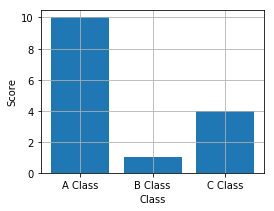

In [6]:
import matplotlib.pyplot as plt

# 画像の大きさとバッグカラーの設定
plt.figure(figsize=(4,3), facecolor="white")

# 表示するデータ
X = [1,2,3]
Y = [10,1,4]

# 棒グラフの表示、中央に寄せている
plt.bar(X, Y, align="center")

# グラフそれぞれのレベル
plt.xticks(X, ['A Class','B Class','C Class'])

# XとYのラベル
plt.xlabel("Class")
plt.ylabel("Score")
plt.grid(True)

先ほどは縦の棒グラフでしたが、横にしたい場合は、barhを使います。なお、xの軸とyの軸が入れかわるので、再設定しています。

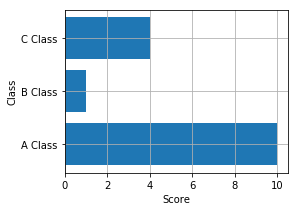

In [7]:
import matplotlib.pyplot as plt

# 画像の大きさとバッグカラーの設定
plt.figure(figsize=(4,3),facecolor="white")

X = [1,2,3]
Y = [10,1,4]

plt.barh(X,Y, align="center")
plt.yticks(X, ['A Class','B Class','C Class'])
plt.ylabel("Class")
plt.xlabel("Score")
plt.grid(True)

複数の棒グラフをそれぞれ比較したいという場合があります。以下では、クラスごとに数学の一期目の成績と最終成績を比較できるようにしています。

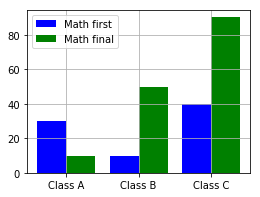

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4,3),facecolor="white")

Y1 = np.array([30,10,40])
Y2 = np.array([10,50,90])

X = np.arange(len(Y1))

# グラフの幅
w=0.4

plt.bar(X, Y1, color='b', width=w, label='Math first', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='Math final', align="center")

# 凡例を最適な位置に配置
plt.legend(loc="best")

plt.xticks(X + w/2, ['Class A','Class B','Class C'])
plt.grid(True)

次は、積み上げの棒グラフです。同じくbarを使い、bottomパラメータの設定に注意してください。

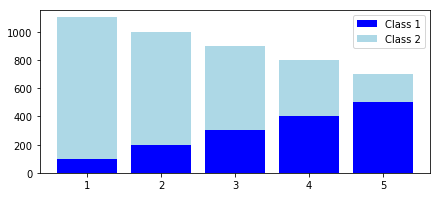

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3),facecolor="white")

left = np.array([1, 2, 3, 4, 5])

height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

p1 = plt.bar(left, height1, color="blue")
p2 = plt.bar(left, height2, bottom=height1, color="lightblue")

plt.legend((p1[0], p2[0]), ("Class 1", "Class 2"))

なお、以前にも紹介しましたが、関数のパラメータ等を調べるには、help関数を使いましょう。

In [6]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg

次は、円グラフです。これは、全体的な割合が各々どれくらいあるのか見るときに使います。pieを使い、それぞれのサイズやラベル等を設定します。axisでグラフの調整をします。autopctでそれぞれの割合を、explodeで特定のカテゴリーだけ、円グラフの全体から離す調整ができます。（ここでは、Hogsを0.1と設定しています。）

(-1.214, 1.135, -1.126, 1.101)

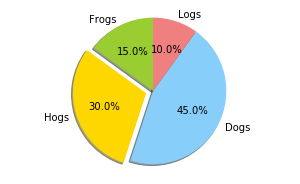

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3),facecolor="white")

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# startangleは各要素の出力を開始する角度を表す(反時計回りが正), 向きはcounterclockで指定可能
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

pie関数のパラメータについて、helpを使って調べてみましょう。

In [8]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each
    wedge is given by ``x/sum(x)``.  If ``sum(x) <= 1``, then the
    values of x give the fractional area directly and the array
    will not be normalized.  The wedges are plotted
    counterclockwise, by default starting from the x-axis.
    
    Parameters
    ----------
    x : array-like
        The input array used to make the pie chart.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the
        fraction of the radius with which to offset each wedge.
    
    labels : list, optional, default: None
        A sequence of strings provid

以下は、scatterを使うことで、バブルチャートを作成しています。

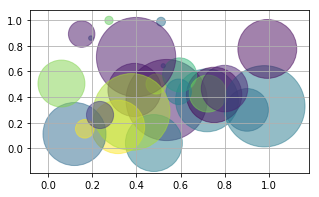

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3),facecolor="white")

N = 25

# X,Y軸
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさ
area = 10 * np.pi * (15 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid(True)

scatter関数のパラメータもhelpを使ってみてみましょう。

In [10]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 

以上で、データの可視化は終了です。なお、pandasにも可視化機能が備わっており、.plot()でグラフ化可能です。具体的には、データの後に.plot(kind="bar")で縦の棒グラフが、kind="barh"で横の棒グラフが、kind="pie"で円グラフを表示できます。必要なときに使ってください。また、本節の練習問題以外にも以前扱ったデータを使って、色々とグラフ化できますので、実際にどのようなグラフができるか、作成してみましょう。

>**[やってみよう]**

>以下の練習問題以外にもデータを色々とグラフ化してみましょう。どのような目的を持って、どんなグラフを作成しますか?

これまでデータの可視化についてPythonの機能を紹介・実行してきました。しかし、データ分析やデータの可視化が注目されている現在、様々なデータ可視化ツール（タブロ、Excel、PowerBIなど）があるため、ビジネスの現場ではそれらを使う場面が多くなっておりPythonや他のプログラミング言語で可視化する機会は減っていきそうな雰囲気はあります。ただし、可視化レポートの自動化、アプリケーションとの連携、可視化の細かい設定等はプログラミングが勝っているケースもあります。そういった用途でデータの可視化を行うときは是非活用してください。

#### <練習問題 1>

以前扱った学生のデータ（student-mat.csv）を使って、学校を選んだ理由（reason）を円グラフ化して、それぞれの割合を出してください。

([<matplotlib.patches.Wedge at 0x10d9566a0>,
  <matplotlib.text.Text at 0x1a1319d518>])

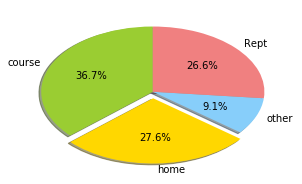

In [19]:
student_data_math = pd.read_csv("student-mat.csv", sep=";")
student_data_math.groupby("reason")["reason"].count()


plt.figure(figsize=(5,3),facecolor="white")

labels = 'course', 'home', 'other', 'Rept'
sizes = [145, 109, 36, 105]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

#### <練習問題 2>

上記と同じデータで、higher - 高い教育を受けたいかどうか(binary: yes or no)を軸にして、それぞれの数学の最終成績G3の平均値を棒グラフで表示してください。ここから何か推測できることはありますか？

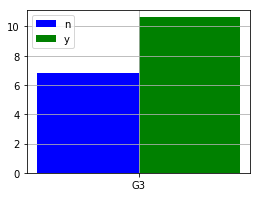

In [23]:
student_data_math.groupby("higher")["G3"].mean()

plt.figure(figsize=(4,3),facecolor="white")

Y1 = np.array([6.800])
Y2 = np.array([10.608])

X = np.arange(len(Y1))

# グラフの幅
w=0.4

plt.bar(X, Y1, color='b', width=w, label='n', align="center")
plt.bar(X + w, Y2, color='g', width=w, label='y', align="center")

# 凡例を最適な位置に配置
plt.legend(loc="best")

plt.xticks(X + w/2, ['G3'])
plt.grid(True)

#### <練習問題 3>

上記と同じデータで、通学時間（traveltime）を軸にして、それぞれの数学の最終成績G3の平均値を横棒グラフで表示してください。何か推測できることはありますか？

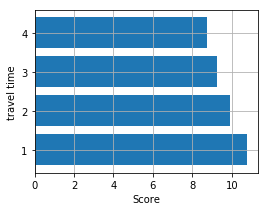

In [27]:
student_data_math.groupby("traveltime")["G3"].mean()

plt.figure(figsize=(4,3),facecolor="white")

X = [1,2,3,4]
Y = [10.78, 9.90, 9.26, 8.75]

plt.barh(X,Y, align="center")
plt.yticks(X, ['1','2','3','4'])
plt.ylabel("travel time")
plt.xlabel("Score")
plt.grid(True)

### 7.1.2 応用：金融データの可視化
キーワード：ローソクチャート

ここでは、金融データの可視化について扱っていきます。ただし、応用範囲ですので、スキップしても問題ありません。練習問題もありません。


>モジュールplotly が必要なので、これをiLectのコマンドプロント上で実行するか、ここの環境で!pip install plotlyを実行してください。


>[参考URL]


>http://qiita.com/toyolab/items/db8a1e539d4f995079d5



In [28]:
# 日付データの設定、Tで1分ごとにデータ生成
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')
# 乱数の発生、１か−１
dn = np.random.randint(2, size=len(idx))*2-1
# ランダムウォーク
# np.cumprodは累積積を算出している(1番目の要素 * 2番目の要素 * 3番目の要素 * … と和が累積されていく)
rnd_walk = np.cumprod(np.exp(dn*0.0002))*100
# Pandas
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

そのままプロットすると以下のようになります。なお、ここではpandasの可視化機能を使っています。

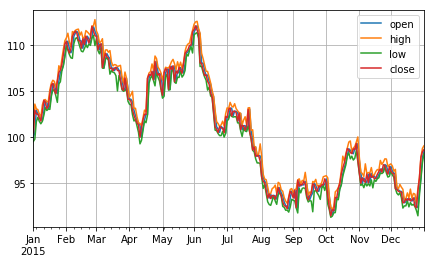

In [29]:
df.plot(figsize=(7,4),legend="best",grid=True)

plotlyのツール、ローソクチャート作成を使えば、以下のように綺麗に表示することが可能です。さらにインタラクティブにグラフをズームインしたり、カーソルを載せると、数字が表示され便利です。

**なお、以下のコードの結果は、現在のiLect上では見ることができませんので、あらかじめご了承ください。もし実行結果を見たい場合は、画面の左にある「Help→Launch Classic Notebook」で以前のバージョンのNotebookを開いたあと、このChapter7をUploadして実行してください。なお、各コンテンツのChapterはダウンロードすることができます。ダウンロードしたいコンテンツを右クリックすると（Macの場合はcontrolを押しながらクリック）、DownLoadがでてきますので、それでダウンロードできます。**

In [12]:
# plotly モジュール
from plotly.offline import init_notebook_mode, iplot
# 旧バージョン
#from plotly.tools import FigureFactory as FF
from plotly import figure_factory as FF

# Jupyter notebook用設定
init_notebook_mode(connected=True) 

# ローソクチャートの設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates=df.index)
iplot(fig)

ModuleNotFoundError: No module named 'plotly'

***

以下は参考文献で、JavaScript等もありますが、データを可視化するのに参考となります。2つ目のPythonユーザのためのJupyter[実践]入門』はJupyterの使い方について詳しく記載があり、データの可視化についてのコンテンツが充実しています。

>[参考文献]

>『PythonとJavaScriptではじめるデータビジュアライゼーション』（Kyran Dale (著), 嶋田 健志 (監修), 木下 哲也 (翻訳)、オライリージャパン）

>『PythonユーザのためのJupyter[実践]入門』（池内 孝啓 (著), 片柳 薫子 (著), 岩尾 エマ はるか (著), @driller (著)、技術評論社）

## 7.2 分析結果の見せ方を考えよう
ゴール：基本的な資料作成の方法を知る、データ分析結果を伝えるためのポイントを知る

### 7.2.1 資料作成のポイントについて
キーワード：特になし

これまでは、データ分析に必要なプログラミング技法を中心に、データ処理やそのテクニックについて学んできました。データの可視化についても、データを棒グラフにしたり、折れ線グラフにする方法、ラベルのつけ方など、テクニカルな解説が中心でした。自分自身の理解のために、探索的にデータをチェックするだけであれば、特に体裁は気にせず、デフォルトでグラフ表示される結果を見るだけでよいかもしれません。しかし、データ分析の結果を第3者に伝えるためには、その見せ方を工夫する必要があります。説明的分析ともいいますが、そのデータ分析結果を他人に伝える方法や、その資料作成の方法について、基本的なポイントを以下に記載します。

データの分析結果の報告は、今の会社にいる上層部への報告、クライアントへの提案などいろいろな場面があります。資料作成の方法には、以下で紹介する参考文献などたくさんありますが、以下のような点は共通して大切です。

- 何のためにデータ分析をして、何を見せたいのかはっきりさせる

- そもそもその分析結果を誰に伝えるのか？を考える

- いきなり資料の作成を開始しない、パワーポイントを開かない、その前に考える

- その結果を見せることで、どんな具体的なアクションを促したいか？

- それをやることでどれだけ儲かるか？コストが下がるのか？

- 目次をはっきりさせる（全体像を見せる）

- 基本的に結論が先

- 情報を入れすぎない、無駄なものは削除

- 言いたいことを一言で＋下にその根拠となるデータ（表）の可視化

- ストーリーを考える

他、第3者に説明するのに、3Dのグラフはあまり使わないほうがいいだとか、いろいろとありますが、それも場面によるので、やはりその結果を誰に見せるのか考えることが大事です。また、先ほども書いたように、データを可視化するのは、Excelや他のツール（タブローなど）でも良いです。この講座はPythonの講座なのでmatplotlibを使ってグラフ等を表示していますが、ビジネスの現場で無理してmatplotlibを使う必要はありません。データがそれほど大きくない場合、素早くデータを可視化するのにExcelは非常に優れています。ケースバイケースで判断して、ツールを選んでください。

短いですが、以上が資料作成の基本となる作法になります。この講座ではこれ以上詳しくは扱いませんので、以下は参考となる本で、資料を作成する際に読んでみてください。なお、本講座は特に資料作成の講座ではないので、テクニカルな技術を身につけるという視点でこのまま解説をしていきます。

>[参考文献]

>『入門 考える技術・書く技術――日本人のロジカルシンキング実践法』（山崎 康司  (著)、ダイヤモンド社）

>『外資系コンサルのスライド作成術―図解表現23のテクニック』（山口 周  (著)、 東洋経済新報社）

>『Google流資料作成術』（コール・ヌッスバウマー・ナフリック (著), 村井 瑞枝 (翻訳)、 日本実業出版社）

以上でデータ可視化の章は終了です。お疲れ様でした。

次の問題は、金融の時系列データとマーケティングの購買データに関する総合問題です。今まで学んだテクニックが活かせる問題です。一部、これまで扱わなかった処理方法もありますので、ヒントなど参考にして、調べながら取り組んでください。初学者にはなかなかハードな問題かもしれませんが、これらの問題に取り組むことで、今まで学んだ技法が役に立つことを実感できるでしょう。

***

## 7.3 総合問題

### 7.3.1 時系列データ分析

ここでは、本章で身に付けたpandasやscipyなどを使って、時系列データついて扱っていきましょう。

（1）（データの取得と確認）下記のサイトより、dow_jones_index.zipをダウンロードし、中にあるdow_jones_index.dataを使って、データを読み込み、はじめの5行を表示してください。またデータのそれぞれのカラム情報等を見て、nullなどがあるか確認してください。　　

https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip　　

（2）（データの加工）カラムのopen、high、low、close等のデータは数字の前に$マークが付いているため、これを取り除いてください。また、日時をdate型で読み込んでいない場合は、date型に変換しましょう。

（3）カラムのcloseについて、各stockごとの要約統計量を算出してください。

（4）カラムのcloseについて、各stockの相関を算出する相関行列を出してください。また、seabornのheatmapを使って、相関行列のヒートマップを描いてみましょう。（ヒント：pandasのcorr()を使います。）

（5）(4)で算出した相関行列の中で一番相関係数が高いstockの組み合わせを抽出してください。さらに、その中でもっとも相関係数が高いペアを抜き出し、それぞれの時系列グラフを書いてください。

（6） pandasのrollingとwindow関数（窓関数）を使って、上記で使った各stockごとに、closeの過去5期（5週間）移動平均時系列データを計算してください。

（7） pandasのshift()を使って、上記で使った各stockごとに、closeの前期（1週前）との比の対数時系列データを計算してください。さらに、この中で、一番ボラティリティ（標準偏差）が一番大きいstockと小さいstockを抜き出し、その対数変化率グラフを書いてください。

In [2]:
cd ./chap7

/Users/macakiroppongi/Documents/python/datascience/chap7


In [13]:
# webからデータを取得したり、zipファイルを扱うためのモジュール
import requests, zipfile
from io import StringIO
import io

# データがあるurl の指定
zip_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip"

# データをurlから取得する
r = requests.get(zip_file_url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [14]:
dj_data = pd.read_csv("dow_jones_index.data")
dj_data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [46]:
dj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null datetime64[ns]
open                                  750 non-null object
high                                  750 non-null object
low                                   750 non-null object
close                                 750 non-null object
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_return_n

In [33]:
f_cut = lambda x: str(x).replace('$', '')

df = dj_data
df['open'] = df['open'].map(f_cut)
df['high'] = df['high'].map(f_cut)
df['low'] = df['low'].map(f_cut)
df['close'] = df['close'].map(f_cut)

df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [34]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [28]:
df.groupby('stock').describe()

close                                 date                              \
      count unique     top freq first last count unique                  top   
stock                                                                          
AA       25     25   16.48    1   NaN  NaN    25     25  2011-04-29 00:00:00   
AXP      25     24   46.25    2   NaN  NaN    25     25  2011-04-29 00:00:00   
BA       25     25   74.84    1   NaN  NaN    25     25  2011-04-29 00:00:00   
BAC      25     23   14.25    2   NaN  NaN    25     25  2011-04-29 00:00:00   
CAT      25     25  109.09    1   NaN  NaN    25     25  2011-04-29 00:00:00   
CSCO     25     25   15.12    1   NaN  NaN    25     25  2011-04-29 00:00:00   
CVX      25     25  101.00    1   NaN  NaN    25     25  2011-04-29 00:00:00   
DD       25     24   50.29    2   NaN  NaN    25     25  2011-04-29 00:00:00   
DIS      25     23   41.52    3   NaN  NaN    25     25  2011-04-29 00:00:00   
GE       25     24   18.82    2   NaN  NaN    25     25  2011-04-29 00:00:00   
HD       25     24   36.00    2   NaN  NaN    25     25  2011-04-29 00:00:00   
HPQ      25     25   40.37    1   NaN  NaN    25     25  2011-04-29 00:00:00   
IBM      25     25  168.89    1   NaN  NaN    25     25  2011-04-29 00:00:00   
INTC     25     24   21.46    2   NaN  NaN    25     25  2011-04-29 00:00:00   
JNJ      25     24   66.09    2   NaN  NaN    25     25  2011-04-29 00:00:00   
JPM      25     24   45.74    2   NaN  NaN    25     25  2011-04-29 00:00:00   
KO       25     25   67.88    1   NaN  NaN    25     25  2011-04-29 00:00:00   
KRFT     25     24   31.19    2   NaN  NaN    25     25  2011-04-29 00:00:00   
MCD      25     25   76.03    1   NaN  NaN    25     25  2011-04-29 00:00:00   
MMM      25     25   93.13    1   NaN  NaN    25     25  2011-04-29 00:00:00   
MRK      25     23   33.07    3   NaN  NaN    25     25  2011-04-29 00:00:00   
MSFT     25     25   25.95    1   NaN  NaN    25     25  2011-04-29 00:00:00   
PFE      25     24   18.34    2   NaN  NaN    25     25  2011-04-29 00:00:00   
PG       25     25   61.49    1   NaN  NaN    25     25  2011-04-29 00:00:00   
T        25     23   28.85    2   NaN  NaN    25     25  2011-04-29 00:00:00   
TRV      25     25   59.80    1   NaN  NaN    25     25  2011-04-29 00:00:00   
UTX      25     24   79.08    2   NaN  NaN    25     25  2011-04-29 00:00:00   
VZ       25     24   35.63    2   NaN  NaN    25     25  2011-04-29 00:00:00   
WMT      25     25   52.13    1   NaN  NaN    25     25  2011-04-29 00:00:00   
XOM      25     25   81.57    1   NaN  NaN    25     25  2011-04-29 00:00:00   

           ...  quarter                 volume                                \
      freq ...      top freq first last  count unique         top freq first   
stock      ...                                                                 
AA       1 ...        2   13   NaN  NaN     25     25   242963398    1   NaN   
AXP      1 ...        2   13   NaN  NaN     25     25    28564910    1   NaN   
BA       1 ...        2   13   NaN  NaN     25     25    25381159    1   NaN   
BAC      1 ...        2   13   NaN  NaN     25     25   480033181    1   NaN   
CAT      1 ...        2   13   NaN  NaN     25     25    28651009    1   NaN   
CSCO     1 ...        2   13   NaN  NaN     25     25  1000362015    1   NaN   
CVX      1 ...        2   13   NaN  NaN     25     25    35824123    1   NaN   
DD       1 ...        2   13   NaN  NaN     25     25    27498887    1   NaN   
DIS      1 ...        2   13   NaN  NaN     25     25    34651349    1   NaN   
GE       1 ...        2   13   NaN  NaN     25     25   520516218    1   NaN   
HD       1 ...        2   13   NaN  NaN     25     25    54816070    1   NaN   
HPQ      1 ...        2   13   NaN  NaN     25     25   134346312    1   NaN   
IBM      1 ...        2   13   NaN  NaN     25     25    31119857    1   NaN   
INTC     1 ...        2   13   NaN  NaN     25     25   231298341    1   NaN   
JNJ  

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null datetime64[ns]
open                                  750 non-null float64
high                                  750 non-null float64
low                                   750 non-null float64
close                                 750 non-null float64
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_retu

In [37]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [48]:
df = df.astype({'high': float, 'low': float, 'close': float, 'open': float})

In [62]:
df.groupby('stock')[['open','high','low','close']].corr()

open      high       low     close
stock                                              
AA    open   1.000000  0.894101  0.832290  0.694062
      high   0.894101  1.000000  0.926830  0.882166
      low    0.832290  0.926830  1.000000  0.926938
      close  0.694062  0.882166  0.926938  1.000000
AXP   open   1.000000  0.945603  0.957569  0.867170
      high   0.945603  1.000000  0.973550  0.955590
      low    0.957569  0.973550  1.000000  0.947096
      close  0.867170  0.955590  0.947096  1.000000
BA    open   1.000000  0.929840  0.925999  0.827845
      high   0.929840  1.000000  0.941958  0.935762
      low    0.925999  0.941958  1.000000  0.927985
      close  0.827845  0.935762  0.927985  1.000000
BAC   open   1.000000  0.980826  0.971124  0.950210
      high   0.980826  1.000000  0.985894  0.985535
      low    0.971124  0.985894  1.000000  0.985486
      close  0.950210  0.985535  0.985486  1.000000
CAT   open   1.000000  0.958813  0.939683  0.855398
      high   0.958813  1.000000  0.971349  0.944463
      low    0.939683  0.971349  1.000000  0.949431
      close  0.855398  0.944463  0.949431  1.000000
CSCO  open   1.000000  0.984920  0.937029  0.914481
      high   0.984920  1.000000  0.944718  0.935658
      low    0.937029  0.944718  1.000000  0.991721
      close  0.914481  0.935658  0.991721  1.000000
CVX   open   1.000000  0.969454  0.917710  0.879677
      high   0.969454  1.000000  0.953892  0.947390
      low    0.917710  0.953892  1.000000  0.974995
      close  0.879677  0.947390  0.974995  1.000000
DD    open   1.000000  0.958589  0.930266  0.826547
      high   0.958589  1.000000  0.969168  0.923240
...               ...       ...       ...       ...
PFE   low    0.967332  0.962110  1.000000  0.933219
      close  0.885791  0.953332  0.933219  1.000000
PG    open   1.000000  0.938011  0.534340  0.829875
      high   0.938011  1.000000  0.556229  0.918260
      low    0.534340  0.556229  1.000000  0.626227
      close  0.829875  0.918260  0.626227  1.000000
T     open   1.000000  0.952073  0.974876  0.921605
      high   0.952073  1.000000  0.964257  0.961376
      low    0.974876  0.964257  1.000000  0.966688
      close  0.921605  0.961376  0.966688  1.000000
TRV   open   1.000000  0.964727  0.959714  0.888052
      high   0.964727  1.000000  0.969202  0.951728
      low    0.959714  0.969202  1.000000  0.957146
      close  0.888052  0.951728  0.957146  1.000000
UTX   open   1.000000  0.939665  0.908466  0.845630
      high   0.939665  1.000000  0.913364  0.942875
      low    0.908466  0.913364  1.000000  0.902320
      close  0.845630  0.942875  0.902320  1.000000
VZ    open   1.000000  0.854728  0.841037  0.790811
      high   0.854728  1.000000  0.892522  0.877398
      low    0.841037  0.892522  1.000000  0.876333
      close  0.790811  0.877398  0.876333  1.000000
WMT   open   1.000000  0.920383  0.905759  0.852238
      high   0.920383  1.000000  0.942153  0.944447
      low    0.905759  0.942153  1.000000  0.952021
      close  0.852238  0.944447  0.952021  1.000000
XOM   open   1.000000  0.948513  0.869164  0.780077
      high   0.948513  1.000000  0.924482  0.888431
      low    0.869164  0.924482  1.000000  0.943982
      close  0.780077  0.888431  0.943982  1.000000

[120 rows x 4 columns]

In [72]:
df = df.sort_values(['stock', 'date'])

In [82]:
arr_corr = df['close'].reshape(30,25)
df_corr = pd.DataFrame(arr_corr).T
df_corr

/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
1,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
3,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
4,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
5,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
6,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
7,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
8,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08
9,16.03,44.28,71.64,14.38,100.02,17.95,99.93,52.90,42.93,20.36,...,32.73,25.68,19.47,61.49,28.46,58.88,81.28,35.85,52.59,82.12


In [80]:
stk = df['stock'].reshape(30,25)
stk[:,1]

/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array(['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
       'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'KRFT', 'MCD',
       'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT',
       'XOM'], dtype=object)

In [83]:
df_corr.columns = [stk[:,1]]

In [86]:
df_corr.corr()

,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492
GE,0.740139,-0.315425,0.139263,0.568918,0.463054,0.362102,0.266078,0.675104,0.817387,1.000000,...,-0.483103,0.376957,-0.142550,-0.138952,-0.286933,0.363037,0.288354,0.411936,0.268604,0.720823


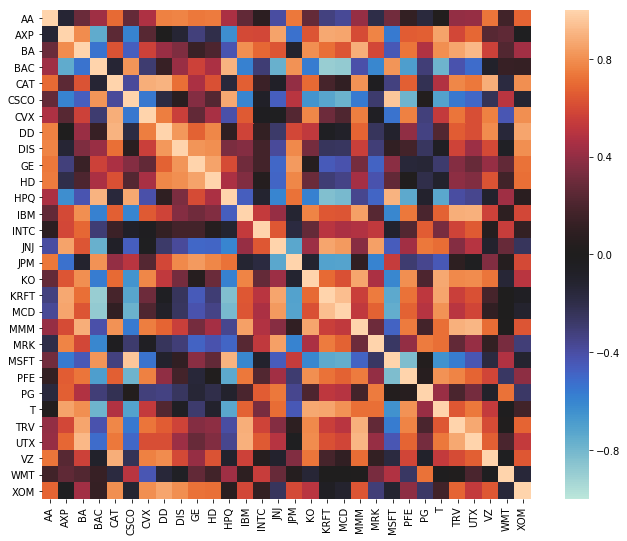

In [87]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_corr.corr(), square=True, vmax=1, vmin=-1, center=0)

In [89]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_corr.columns
    for i in range(0, df_corr.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df_corr.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
CSCO  MSFT    0.953722
KRFT  MCD     0.929921
BA    UTX     0.916338
dtype: float64


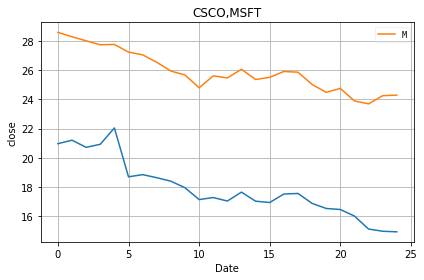

In [112]:
plots = plt.plot(np.arange(25), df_corr['CSCO'])
plt.legend(plots, ('CSCO'),             # 3つのプロットラベルの設定
           framealpha=0.25,                                # 凡例の透明度
           prop={'size': 'small', 'family': 'monospace'})  # 凡例のfontプロパティ

plots = plt.plot(np.arange(25), df_corr['MSFT'])
plt.legend(plots, ('MSFT'),             # 3つのプロットラベルの設定
           framealpha=0.25,                                # 凡例の透明度
           prop={'size': 'small', 'family': 'monospace'})  # 凡例のfontプロパティ

plt.title('CSCO,MSFT')  # タイトル名
plt.xlabel('Date')              # 横軸のラベル名
plt.ylabel('close')          # 縦軸のラベル名
plt.grid(True)                  # 目盛の表示
plt.tight_layout()              # 全てのプロット要素を図ボックスに収める

# 描画実行
plt.show()

In [117]:
df_corr['CSCO'].rolling(window=5, min_periods=5).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4     21.176
5     20.722
6     20.250
7     19.834
8     19.328
9     18.508
10    18.196
11    17.882
12    17.562
13    17.412
14    17.228
15    17.188
16    17.236
17    17.340
18    17.186
19    17.086
20    16.990
21    16.688
22    16.200
23    15.818
24    15.498
Name: CSCO, dtype: float64

In [118]:
df_corr['MSFT'].rolling(window=5, min_periods=5).mean()

0        NaN
1        NaN
2        NaN
3        NaN
4     28.088
5     27.818
6     27.570
7     27.276
8     26.916
9     26.498
10    26.008
11    25.720
12    25.506
13    25.530
14    25.468
15    25.612
16    25.672
17    25.750
18    25.542
19    25.366
20    25.214
21    24.810
22    24.376
23    24.222
24    24.184
Name: MSFT, dtype: float64

In [131]:
import math

In [134]:
sh_csco = df_corr['CSCO'].shift(-1)
csco = pd.concat([df_corr['CSCO'], sh_csco], axis=1)
csco.columns = ['orig', 'sh']
csco

,orig,sh
0,20.97,21.21
1,21.21,20.72
2,20.72,20.93
3,20.93,22.05
4,22.05,18.70
5,18.70,18.85
6,18.85,18.64
7,18.64,18.40
8,18.40,17.95
9,17.95,17.14


In [140]:
def f_log(x,y):
    return np.log(x/y)

csco['log'] = f_log(csco['orig'],csco['sh'])
csco

,orig,sh,log
0,20.97,21.21,-0.011380
1,21.21,20.72,0.023373
2,20.72,20.93,-0.010084
3,20.93,22.05,-0.052129
4,22.05,18.70,0.164789
5,18.70,18.85,-0.007989
6,18.85,18.64,0.011203
7,18.64,18.40,0.012959
8,18.40,17.95,0.024761
9,17.95,17.14,0.046175


In [141]:
sh_msft = df_corr['MSFT'].shift(-1)
msft = pd.concat([df_corr['MSFT'], sh_msft], axis=1)
msft.columns = ['orig', 'sh']
msft

,orig,sh
0,28.60,28.30
1,28.30,28.02
2,28.02,27.75
3,27.75,27.77
4,27.77,27.25
5,27.25,27.06
6,27.06,26.55
7,26.55,25.95
8,25.95,25.68
9,25.68,24.80


In [142]:
def f_log(x,y):
    return np.log(x/y)

msft['log'] = f_log(msft['orig'],msft['sh'])
msft

,orig,sh,log
0,28.60,28.30,0.010545
1,28.30,28.02,0.009943
2,28.02,27.75,0.009683
3,27.75,27.77,-0.000720
4,27.77,27.25,0.018903
5,27.25,27.06,0.006997
6,27.06,26.55,0.019027
7,26.55,25.95,0.022858
8,25.95,25.68,0.010459
9,25.68,24.80,0.034869


※(6),(7)の補足

時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の過去n期の移動平均データとは、過去5期のデータの平均、

\begin{eqnarray}
ma_t = \sum_{s=t-n+1}^t \frac{y_s}{n}
\end{eqnarray}

時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の前期（1週前）との比の対数時系列データとは、$\log \frac{y_t} {y_{t-1}}$から成るデータの事です。増減率$r_t = \frac{y_t - y_{t-1}}{y_t}$が小さいとき、$r_t \approx \log \frac{y_t} {y_{t-1}}$の関係が成り立ちます。これは、$x$が十分小さいときに成り立つ、$\log (1+x) \approx x$から導かれます。増減率データ$(r_1,\cdots ,r_N )$のボラティリティとは、標準偏差

\begin{eqnarray}
\sqrt{\frac{1}{N}\sum_{t=1}^N (r_t - \frac{1}{N}\sum_{t=1}^N r_t)^2}
\end{eqnarray}

の事で、価格変動の大きさを示す指標として利用されます。

### 7.3.2 マーケティング分析

次は、マーケティング分析でよく扱われる購買データです。一般ユーザーとは異なる法人の購買データですが、分析する軸は基本的に同じです。

（1）下記のURLよりデータをpandasで読み込んでください（件数50万以上のデータで比較的大きいため、少し時間がかかります。）

    "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    
    (ヒント)pd.ExcelFileを使って、シートを.parse('Online Retail')で指定してください。
    
    また、今回の分析対象は、CustomerIDにデータが入っているレコードのみ対象にするため、そのための処理をしてください。さらに、カラムのInvoiceNoには数字の前にCがあるものはキャンセルのため、このデータを取り除いてください。他にもデータとして取り除く必要なものがあれば、適宜処理してください。以下、このデータをベースに分析していきます。

（2）このデータのカラムには、購買日時や商品名、数量、回数、購買者のIDなどがあります。ここで、購買者（CustomerID）のユニーク数、バスケット数（InvoiceNoのユニーク数）、商品の種類（StockCodeベースとDescriptionベースのユニーク数）を求めてください。

（3）このデータのカラムには、Countryがあります。このカラムを軸に、それぞれの国の購買合計金額（単位あたりの金額×数量の合計）を求め、降順にならべて、上位5つの国の結果を表示してください。

（4）上の上位5つの国について、それぞれの国の商品売り上げ（合計金額）の月別の時系列推移をグラフにしてください。ここで、グラフは分けて表示してください。

（5）上の上位5つの国について、それぞれの国における商品の売り上げTOP5の商品を抽出してください。また、それらを国ごとに円グラフにしてください。なお、商品は「Description」ベースで集計してください。